<a href="https://colab.research.google.com/github/marioTavFer/somePython/blob/main/model_macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos Multifatores usando VAR

Vamos investigar os fatores que representam mudanças inesperadas de variáveis macroeconômicas em retornos de ações. A ideia será denotar a mudança inesperada como o resíduo de variáveis macroeconômicas após a remoção de sua dependência dinâmica por meio do uso de um VAR e utilizar uma regressão linear para modelar a relação com o mercado acionário. Fazemos o uso das variáveis Câmbio real, Embi BR, PIB Mensal, Selic e IPCA.

Variáveis macroeconômicas contém informações relevantes para a formação do preço de uma ação, entretanto, os preços de ações são comumente sensíveis a novas noticias econômicas, principalmente aquelas não esperadas.

Uma forma interessante de obter essa "informação não esperada" pode ser usando os erros de um VAR para um conjunto de variáveis macroeconômicas estabelecidas.

Neste exercício, escolhemos: Câmbio real, Embi BR, PIB Mensal, Selic e IPCA para obter as informações não conhecidas, usando o resíduo do modelo. Com a obtenção do resíduo de cada variável, as regredimos e obtemos a relação dessas surpresas em relação aos log retornos de quatro ativos do mercado acionário brasileiro: WEGE3, CMIG4, ITSA4 e BRFS3.


# 1. Carrega Bibliotecas

In [ ]:
!pip install patchworklib
!pip install plotnine

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from plotnine import *
import patchworklib as pw

<Figure size 100x100 with 0 Axes>

# 2. Coleta os dados

In [ ]:
dados_macro = pd.read_csv("https://aluno.analisemacro.com.br/download/54198/?tmstv=1692810091", parse_dates = ['date']).set_index('date')
retornos = pd.read_csv("https://aluno.analisemacro.com.br/download/54201/?tmstv=1692810091", parse_dates = ['date']).set_index('date')

In [ ]:
dados_macro

,cambio_real,embi_br,pib_mensal,selic,ipca
date,,,,,
2004-02-01,7.670728,163.543723,18593.861374,1.777862,0.61
2004-03-01,-5.538238,-99.972257,58782.878394,-0.195043,0.47
2004-04-01,1.558401,28.715942,-60146.243812,-0.299836,0.37
2004-05-01,12.437291,92.751553,6859.930720,0.058140,0.51
2004-06-01,-12.088590,-188.740260,3253.310759,0.552420,0.71
...,...,...,...,...,...
2023-02-01,-0.877326,-4.489724,81710.823039,-0.042328,0.84
2023-03-01,3.174853,16.092906,81378.813158,0.018694,0.71
2023-04-01,-6.387089,-12.009497,-147837.554473,0.014265,0.61


In [ ]:
retornos

,BRFS3.SA.Adjusted,CMIG4.SA.Adjusted,ITSA4.SA.Adjusted,WEGE3.SA.Adjusted
date,,,,
2007-02-01,-0.051852,0.040892,-0.030638,-0.055556
2007-03-01,0.078125,-0.039285,-0.090910,0.058824
2007-04-01,0.107246,0.065055,-0.025461,-0.027778
2007-05-01,0.138743,0.055847,0.077478,0.000000
2007-06-01,0.048851,0.089117,0.012541,0.034286
...,...,...,...,...
2023-04-01,0.020934,0.089392,0.055961,0.014057
2023-05-01,0.282334,-0.052632,0.011521,-0.085360
2023-06-01,0.095941,0.115906,0.113944,0.005324


# 3. Cria o Modelo

## 3.1 VAR

In [ ]:
model = VAR(dados_macro).fit(maxlags = 1, trend = 'c')
model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Aug, 2023
Time:                     19:02:07
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    27.0302
Nobs:                     232.000    HQIC:                   26.7643
Log likelihood:          -4699.77    FPE:                3.51183e+11
AIC:                      26.5845    Det(Omega_mle):     3.09093e+11
--------------------------------------------------------------------
Results for equation cambio_real
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.700234         0.643453           -1.088           0.276
L1.cambio_real        -0.323265         0.077349           -4.179           0.000
L1.embi_br            -0.000300         0.011451  

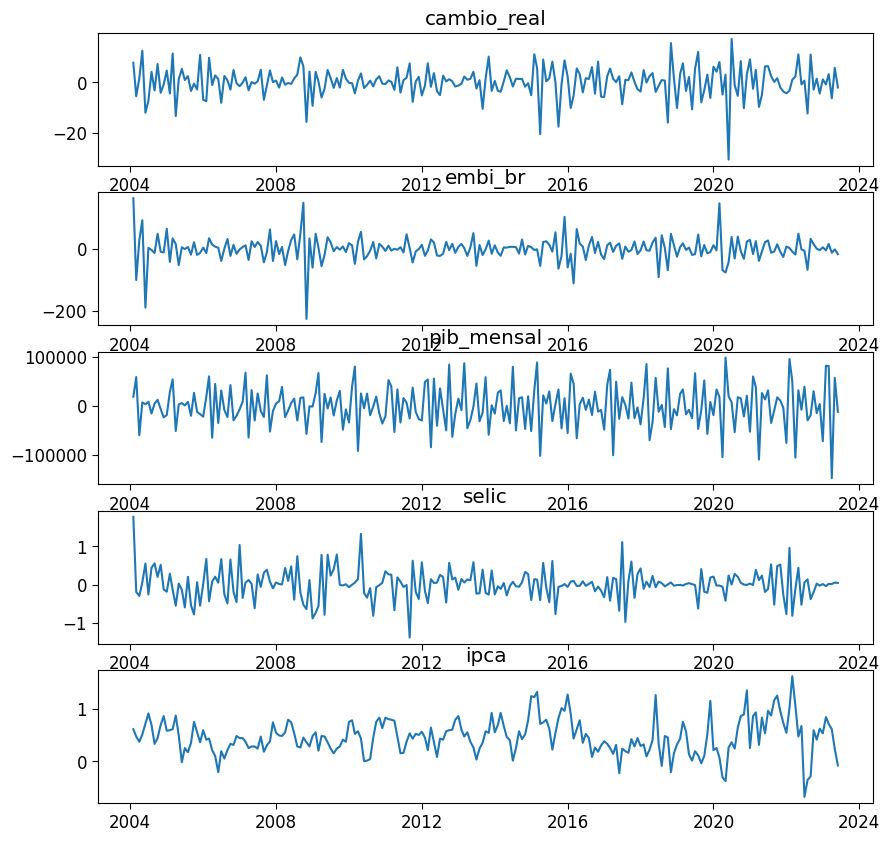

In [ ]:
model.plot();

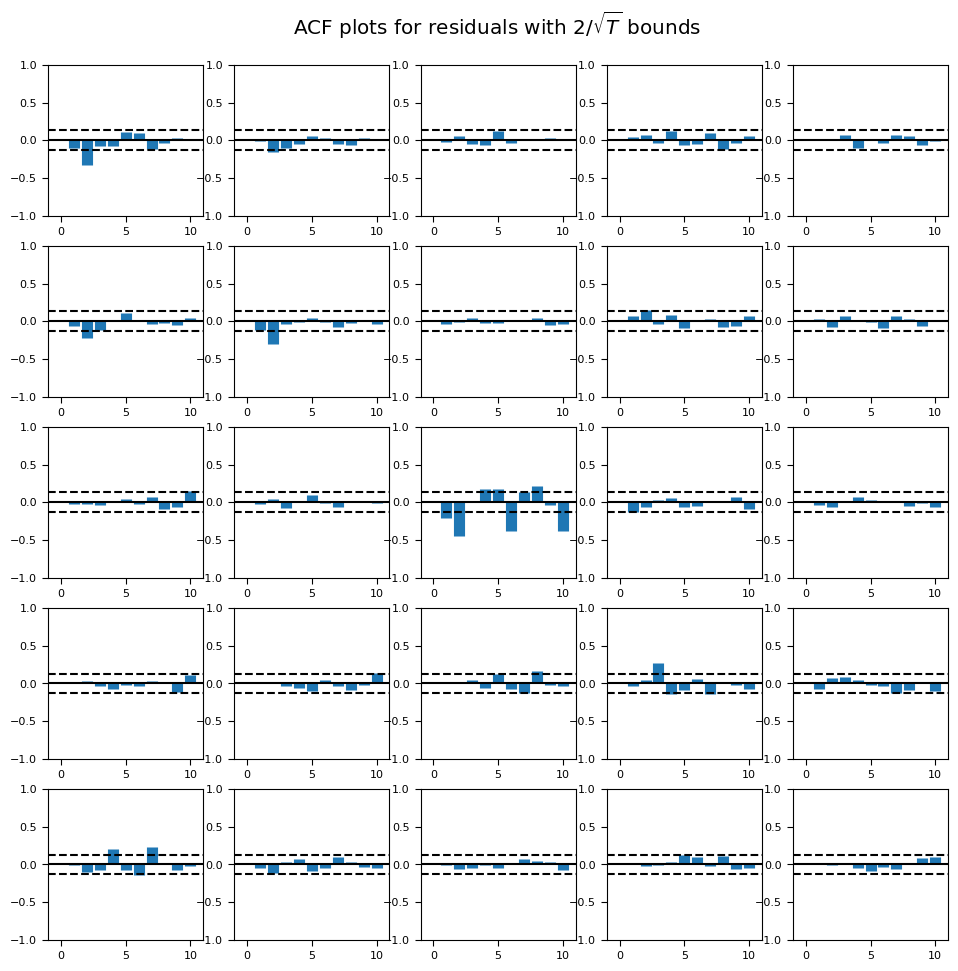

In [ ]:
model.plot_acorr();

In [ ]:
residuos = model.resid

In [ ]:
residuos

,cambio_real,embi_br,pib_mensal,selic,ipca
date,,,,,
2004-03-01,-4.547078,-42.572660,48548.459462,0.165973,-0.077839
2004-04-01,0.230644,-5.907860,-30873.853881,-0.209630,-0.050380
2004-05-01,13.021137,103.127925,-18130.579192,-0.117743,0.058995
2004-06-01,-8.097250,-158.050404,12222.528478,0.527589,0.195833
2004-07-01,-12.106800,-73.494276,2604.463712,-0.058269,0.286876
...,...,...,...,...,...
2023-02-01,-1.001115,-7.354100,48732.504493,-0.164881,0.271566
2023-03-01,2.841725,19.819408,119617.859958,0.104399,0.092741
2023-04-01,-5.264987,-2.857121,-107969.400901,0.116126,0.057652


## 3.2 Regressão Linear

In [ ]:
lm_dados = residuos.join(retornos).dropna().rename(columns =  {'BRFS3.SA.Adjusted' : 'brf3',
                                                               'CMIG4.SA.Adjusted' : 'cmig4',
                                                               'ITSA4.SA.Adjusted' : 'itsa4',
                                                               'WEGE3.SA.Adjusted' : 'wege3'})

In [ ]:
lm_dados

,cambio_real,embi_br,pib_mensal,selic,ipca,brf3,cmig4,itsa4,wege3
date,,,,,,,,,
2007-02-01,-1.464408,1.104493,-6034.882789,-0.115178,-0.025501,-0.051852,0.040892,-0.030638,-0.055556
2007-03-01,2.299978,18.297160,75264.218517,-0.021338,-0.062721,0.078125,-0.039285,-0.090910,0.058824
2007-04-01,-2.075327,-27.104797,-32630.499558,0.236304,-0.105039,0.107246,0.065055,-0.025461,-0.027778
2007-05-01,-1.121482,8.245371,-379.247927,-0.024958,-0.108124,0.138743,0.055847,0.077478,0.000000
2007-06-01,-0.121185,20.696993,-16325.393649,-0.565708,-0.037492,0.048851,0.089117,0.012541,0.034286
...,...,...,...,...,...,...,...,...,...
2023-02-01,-1.001115,-7.354100,48732.504493,-0.164881,0.271566,-0.226131,-0.085515,-0.035170,0.029941
2023-03-01,2.841725,19.819408,119617.859958,0.104399,0.092741,0.008117,0.111276,0.011701,0.036880
2023-04-01,-5.264987,-2.857121,-107969.400901,0.116126,0.057652,0.020934,0.089392,0.055961,0.014057


In [ ]:
# Regressão para brf
brf_formula = "brf3 ~ cambio_real + embi_br + pib_mensal + selic + ipca"
brf_result = sm.OLS.from_formula(brf_formula, data=lm_dados).fit()

# Regressão para cmig
cmig_formula = "cmig4	 ~ cambio_real + embi_br + pib_mensal + selic + ipca"
cmig_result = sm.OLS.from_formula(cmig_formula, data=lm_dados).fit()

# Regressão para itsa
itsa_formula = "itsa4 ~ cambio_real + embi_br + pib_mensal + selic + ipca"
itsa_result = sm.OLS.from_formula(itsa_formula, data=lm_dados).fit()

# Regressão para wege
wege_formula = "wege3 ~ cambio_real + embi_br + pib_mensal + selic + ipca"
wege_result = sm.OLS.from_formula(wege_formula, data=lm_dados).fit()

In [ ]:
# Criando o dataframe 'results'
results = pd.DataFrame({
    'cambio': [brf_result.params['cambio_real'], cmig_result.params['cambio_real'], itsa_result.params['cambio_real'], wege_result.params['cambio_real']],
    'embi_br': [brf_result.params['embi_br'], cmig_result.params['embi_br'], itsa_result.params['embi_br'], wege_result.params['embi_br']],
    'pib_mensal': [brf_result.params['pib_mensal'], cmig_result.params['pib_mensal'], itsa_result.params['pib_mensal'], wege_result.params['pib_mensal']],
    'selic': [brf_result.params['selic'], cmig_result.params['selic'], itsa_result.params['selic'], wege_result.params['selic']],
    'ipca': [brf_result.params['ipca'], cmig_result.params['ipca'], itsa_result.params['ipca'], wege_result.params['ipca']],
    'ativos': ["BRFS3", "CMIG4", "ITSA4", "WEGE3"]
})

In [ ]:
results

,cambio,embi_br,pib_mensal,selic,ipca,ativos
0,0.003118,-0.001342,-8.135297e-08,-0.019498,-0.013174,BRFS3
1,-0.002705,-0.000919,2.795914e-07,0.006880,-0.023733,CMIG4
2,-0.002062,-0.000736,8.060751e-08,-0.006079,-0.001857,ITSA4
3,0.001373,-0.000583,-3.455858e-08,-0.002996,0.044876,WEGE3


# 4. Visualiza os dados

In [ ]:
# Supondo que você tenha o dataframe 'results' criado anteriormente

# Criação dos gráficos
cambio_plot = pw.load_ggplot(
    ggplot(results, aes(x='ativos', y='cambio'))
    + geom_col()
    + labs(x="", y="", title="Câmbio")
)

embi_br_plot = pw.load_ggplot(
    ggplot(results, aes(x='ativos', y='embi_br'))
    + geom_col()
    + labs(x="", y="", title="Embi Br")
)

pib_mensal_plot = pw.load_ggplot(
    ggplot(results, aes(x='ativos', y='pib_mensal'))
    + geom_col()
    + labs(x="", y="", title="PIB Mensal")
)

selic_plot = pw.load_ggplot(
    ggplot(results, aes(x='ativos', y='selic'))
    + geom_col()
    + labs(x="", y="", title="Selic")
)

ipca_plot = pw.load_ggplot(
    ggplot(results, aes(x='ativos', y='ipca'))
    + geom_col()
    + labs(x="", y="", title="IPCA")
)

# Combinando os gráficos usando o patchwork
combined_plots = (cambio_plot|embi_br_plot)/(pib_mensal_plot|selic_plot)|ipca_plot

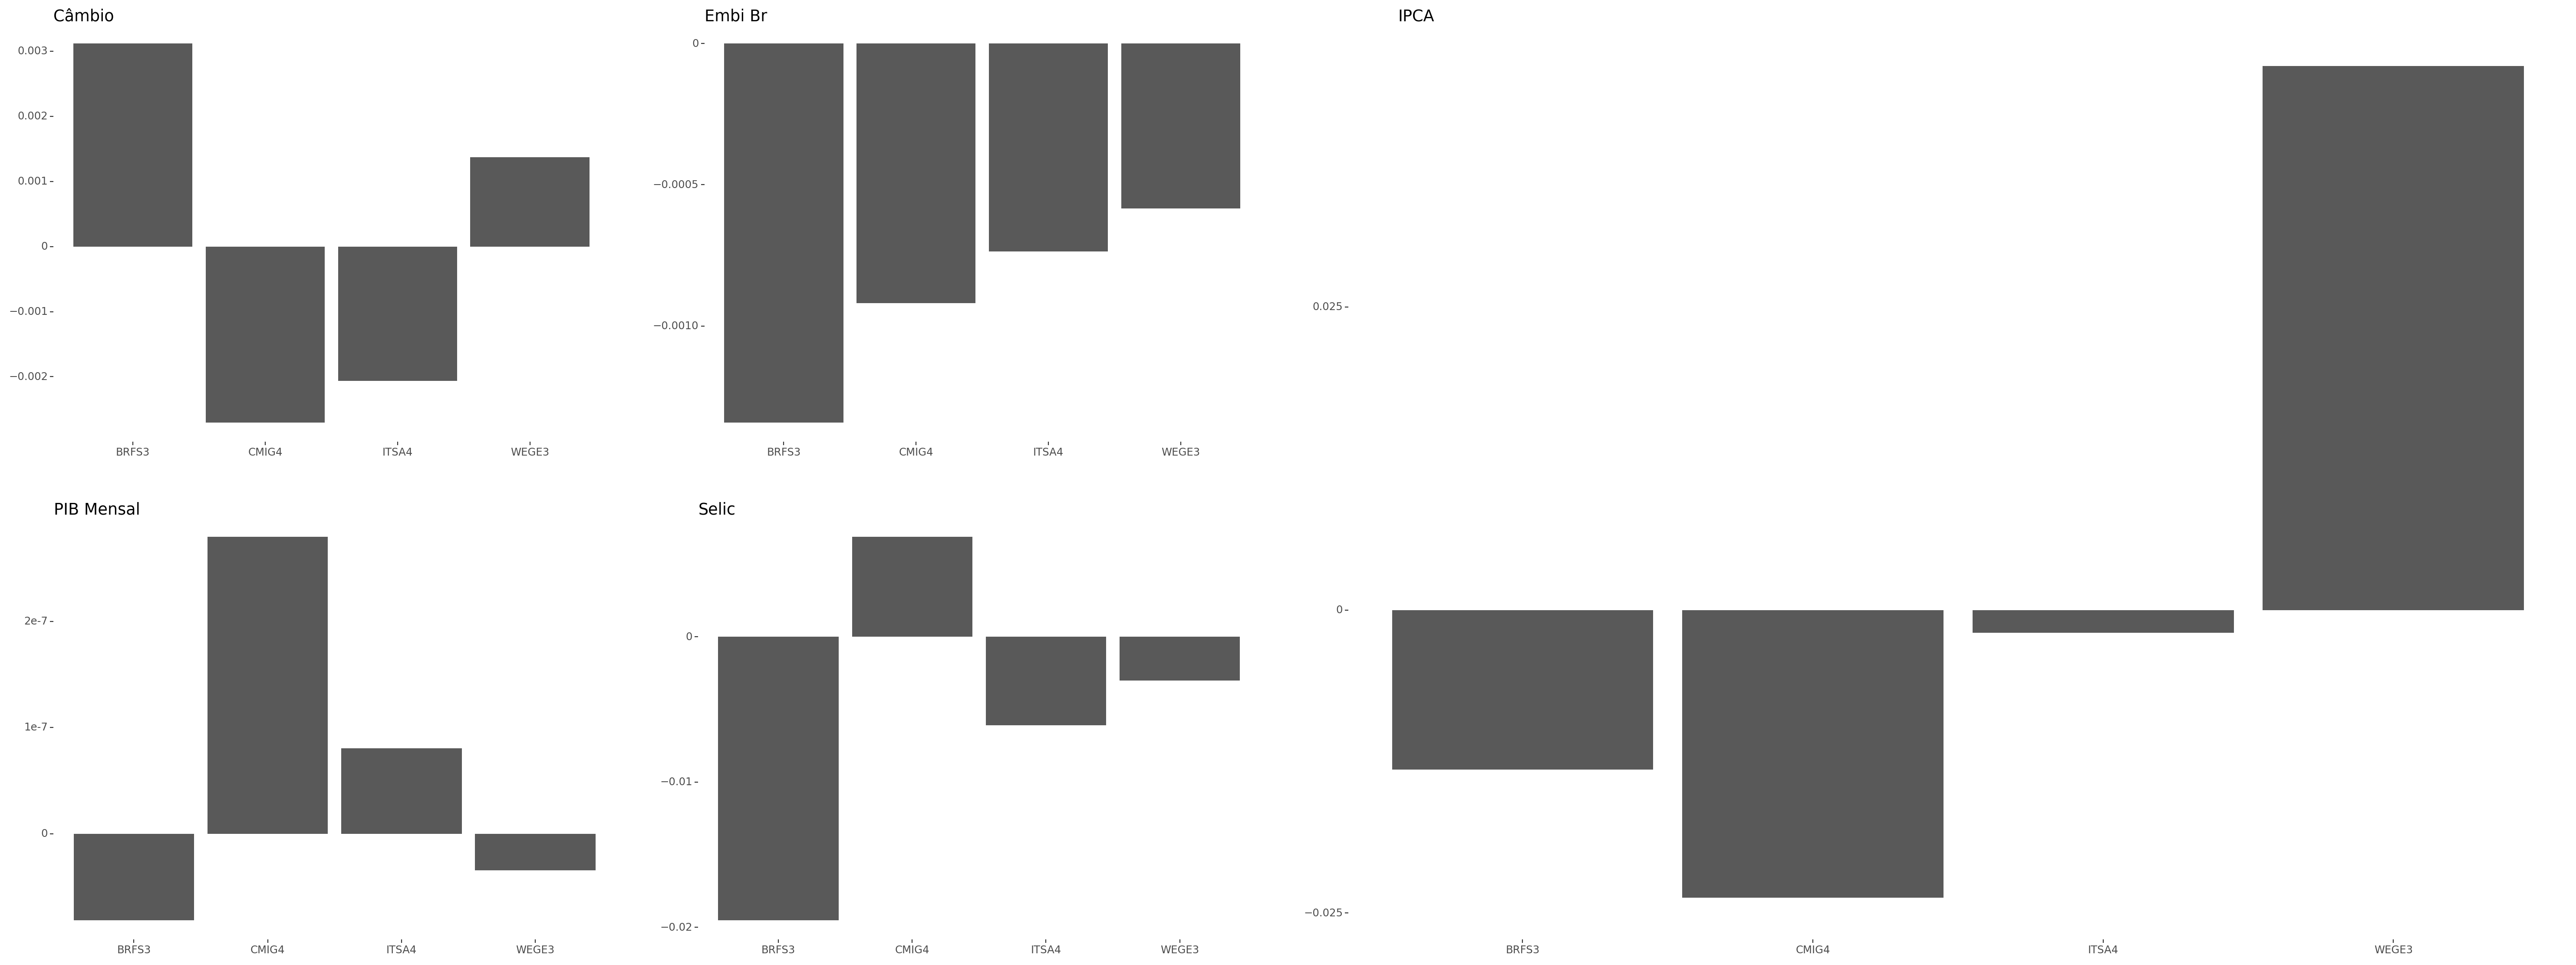

In [ ]:
combined_plots